**Set environment**

In [3]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(library(pheatmap)))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


## Import count matrix

In [4]:
ASSAY   = "Tewhey_K562_TileMPRA"
FOLDER   = "coverage_astarrseq_peak_macs_input"
DATASETS = c("OL13", "OL43", "OL45")
TYPE     = "raw"

In [5]:
###
lst = lapply(DATASETS, function(DATASET){
    fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
    fname = paste("matrix", "deseq", "count", DATASET, "tsv", sep=".")
    fpath = file.path(fdiry, fname)
    dat   = read_tsv(fpath, show_col_types = FALSE)
    dat   = dat %>% dplyr::mutate(Dataset = DATASET)
    return(dat)
})

###
cnames = c("Peak", "Dataset", paste0("Input.rep", 1:4), paste0("Output.rep", 1:4))
dat = bind_rows(lst)
dat = dat %>% dplyr::select(!!cnames)

###
dat_count_batch = dat
print(dim(dat))
head(dat)

[1] 1451   10


Peak,Dataset,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Output.rep1,Output.rep2,Output.rep3,Output.rep4
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61792068_61793464,OL13,124670.74,123167.59,127268.62,123604.24,379932.388,400497.009,419950.20,382846.15
chr11_61800085_61801113,OL13,93961.66,94620.71,93628.85,92690.22,349840.912,346627.120,355854.18,304277.02
chr11_61806630_61807154,OL13,73669.62,69879.13,70880.48,69350.47,24533.110,25122.717,29545.41,31637.71
chr11_61814735_61817343,OL13,202141.92,203733.30,202944.36,196887.87,1147134.438,1222026.706,1180879.95,1106807.59
chr11_61822094_61822443,OL13,32095.95,31325.07,31749.03,30863.91,6818.186,8160.235,10473.71,11418.74
chr11_61825795_61826306,OL13,32867.32,33514.81,33610.61,34128.29,24191.171,25906.336,25389.86,26706.79


In [6]:
DATASET = "OL13_OL43_OL45"

###
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = paste("matrix", "deseq", "count", DATASET, "tsv", sep=".")
fpath = file.path(fdiry, fname)
dat   = read_tsv(fpath, show_col_types = FALSE)

### 
dat_count_merge = dat
print(dim(dat))
head(dat)

[1] 1451    9


Peak,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Output.rep1,Output.rep2,Output.rep3,Output.rep4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61792068_61793464,128400.17,78342.13,128995.05,81828.58,387728.86,465098.228,635961.62,480064.23
chr11_61800085_61801113,96772.44,60184.56,94898.94,61362.85,357019.88,402538.985,538896.27,381543.64
chr11_61806630_61807154,75873.39,44447.41,71841.99,45911.45,25036.55,29175.077,44742.79,39671.64
chr11_61814735_61817343,208188.83,129586.85,205697.35,130343.87,1170674.41,1419142.823,1788293.74,1387864.90
chr11_61822094_61822443,33056.07,19924.66,32179.71,20432.55,6958.10,9476.503,15861.12,14318.36
chr11_61825795_61826306,33850.52,21317.47,34066.55,22593.64,24687.59,30085.096,38449.74,33488.58


**Setup peaks**

In [7]:
###
dat = dat_count_batch
dat = dat %>% 
    dplyr::select(Peak, Dataset) %>%
    tidyr::separate(Peak, into=c("Chrom", "Start", "End"), remove = FALSE)

###
dat_peak = dat
print(dim(dat))
head(dat)

[1] 1451    5


Peak,Chrom,Start,End,Dataset
<chr>,<chr>,<chr>,<chr>,<chr>
chr11_61792068_61793464,chr11,61792068,61793464,OL13
chr11_61800085_61801113,chr11,61800085,61801113,OL13
chr11_61806630_61807154,chr11,61806630,61807154,OL13
chr11_61814735_61817343,chr11,61814735,61817343,OL13
chr11_61822094_61822443,chr11,61822094,61822443,OL13
chr11_61825795_61826306,chr11,61825795,61826306,OL13


In [74]:
table(dat_peak$Dataset)


OL13 OL43 OL45 
  22  394 1035 

## Import log2FC

In [66]:
ASSAY   = "Tewhey_K562_TileMPRA"
FOLDER   = "coverage_astarrseq_peak_macs_input"
DATASETS = c("OL13", "OL43", "OL45")
TYPE     = "raw"

In [67]:
###
lst = lapply(DATASETS, function(DATASET){
    fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
    fname = paste("result", "Log2FC", "raw", "deseq", DATASET, "tsv", sep=".")
    fpath = file.path(fdiry, fname)
    dat   = read_tsv(fpath, show_col_types = FALSE)
    dat   = dat %>% dplyr::mutate(Dataset = DATASET)
    return(dat)
})

###
dat = bind_rows(lst)

###
dat_log2fc_batch = dat
print(dim(dat))
head(dat)

[1] 1451    8


Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Dataset
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr11_61792068_61793464,260242.12,1.6665705,0.04117109,40.479145,0.000000e+00,0.000000e+00,OL13
chr11_61800085_61801113,216437.58,1.8554055,0.04972890,37.310405,1.112851e-291,6.120682e-293,OL13
chr11_61806630_61807154,49327.33,-1.3562455,0.08825841,-15.366758,2.735191e-53,4.628784e-53,OL13
chr11_61814735_61817343,682819.52,2.5310135,0.03452518,73.309201,0.000000e+00,0.000000e+00,OL13
chr11_61822094_61822443,20363.10,-1.7731145,0.14597377,-12.146802,5.965339e-34,7.719850e-34,OL13
chr11_61825795_61826306,29539.40,-0.3921839,0.07941651,-4.938318,7.879932e-07,7.879932e-07,OL13


In [68]:
DATASET = "OL13_OL43_OL45"

###
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = paste("result", "Log2FC", "raw", "deseq", DATASET, "tsv", sep=".")
fpath = file.path(fdiry, fname)
dat   = read_tsv(fpath, show_col_types = FALSE)
dat   = dat %>% dplyr::mutate(Dataset = DATASET)

### 
dat_log2fc_merge = dat
print(dim(dat))
head(dat)

[1] 1451    8


Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Dataset
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr11_61792068_61793464,298302.36,2.2372777,0.2178000,10.272163,9.407117e-25,3.095176e-24,OL13_OL43_OL45
chr11_61800085_61801113,249152.20,2.4232145,0.2095584,11.563433,6.313295e-31,2.602441e-30,OL13_OL43_OL45
chr11_61806630_61807154,47087.54,-0.7802144,0.2138748,-3.647996,2.642938e-04,3.544273e-04,OL13_OL43_OL45
chr11_61814735_61817343,804974.10,3.0971351,0.2059268,15.039984,4.016480e-51,2.490561e-50,OL13_OL43_OL45
chr11_61822094_61822443,19025.88,-1.1796750,0.3232780,-3.649104,2.631567e-04,3.532289e-04,OL13_OL43_OL45
chr11_61825795_61826306,29817.40,0.1802465,0.1777814,1.013866,3.106467e-01,3.326557e-01,OL13_OL43_OL45


## Scatter plot of Log2FC

In [69]:
dat1 = dat_log2fc_batch %>% 
    dplyr::select(Peak, log2FoldChange) %>% 
    dplyr::mutate(Process = "Batch")

dat2 = dat_log2fc_merge %>% 
    dplyr::select(Peak, log2FoldChange) %>% 
    dplyr::mutate(Process = "Merge")

dat = bind_rows(dat1, dat2)
dat = dat %>% 
    tidyr::spread(Process, log2FoldChange) %>% 
    dplyr::inner_join(dat_peak, by="Peak")
print(dim(dat))
head(dat)

[1] 1451    7


Peak,Batch,Merge,Chrom,Start,End,Dataset
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr11_32870601_32871324,-0.7204802,-0.6907693,chr11,32870601,32871324,OL45
chr11_32874343_32875070,-0.3764823,-0.3429198,chr11,32874343,32875070,OL45
chr11_32884749_32885822,0.2810407,0.3058916,chr11,32884749,32885822,OL45
chr11_32892099_32894437,0.9807528,1.0035681,chr11,32892099,32894437,OL45
chr11_32901572_32902485,-0.8152472,-0.7881525,chr11,32901572,32902485,OL45
chr11_32903491_32904506,-0.6827379,-0.6557636,chr11,32903491,32904506,OL45


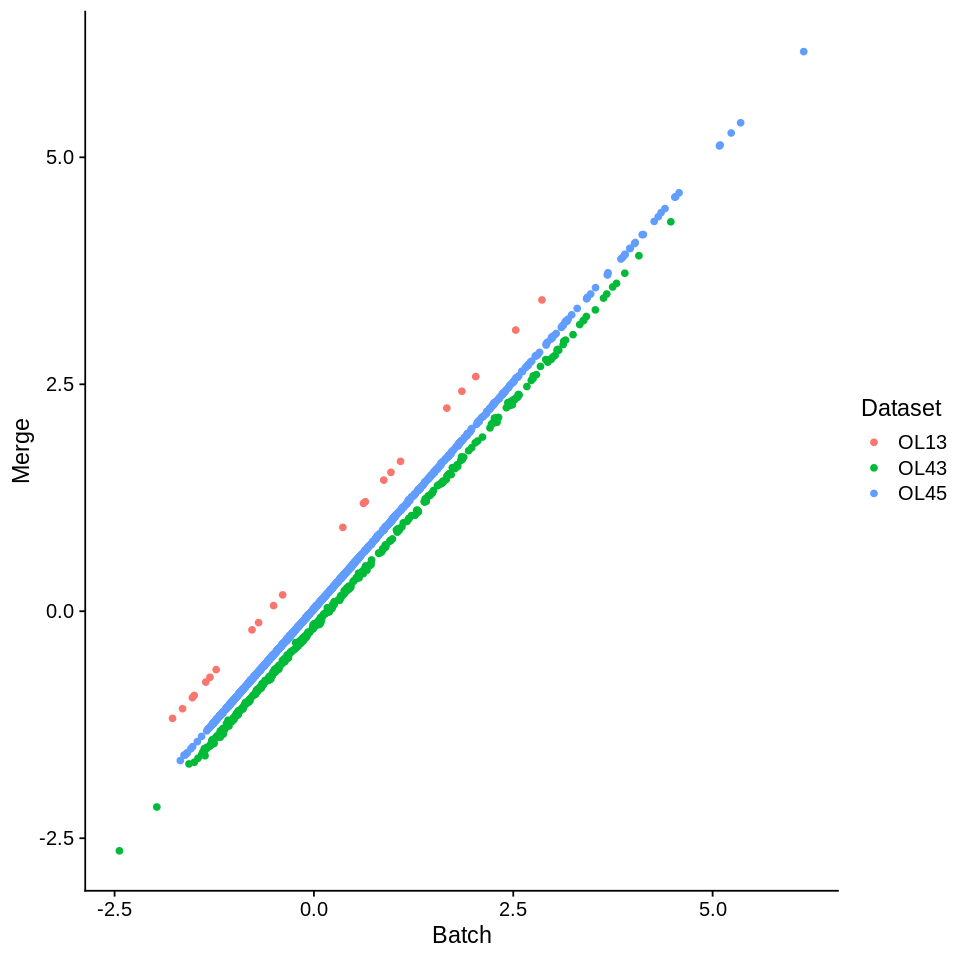

In [70]:
gpt = ggplot(dat, aes(x=Batch, y=Merge, color=Dataset)) + geom_point() + theme_cowplot()

options(repr.plot.height=8, repr.plot.width=8)
print(gpt)

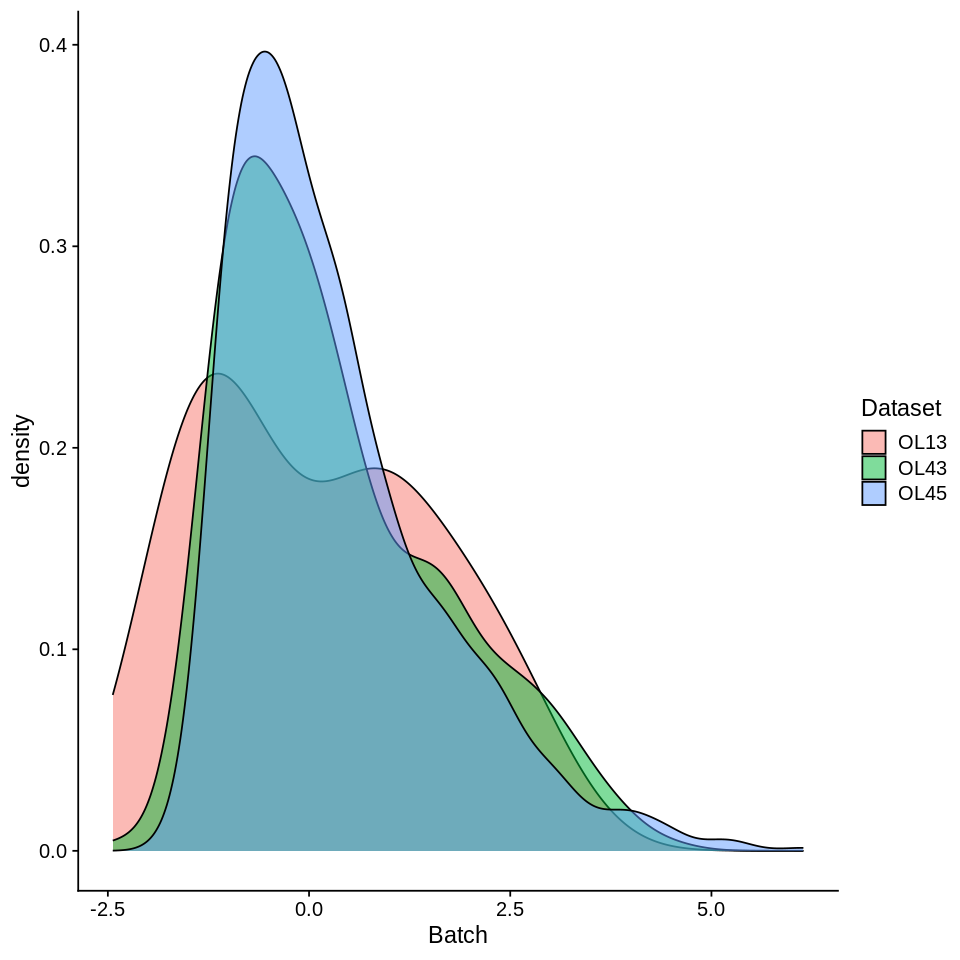

In [71]:
gpt = ggplot(dat, aes(x=Batch, fill=Dataset)) + geom_density(alpha=0.5) + theme_cowplot()
print(gpt)

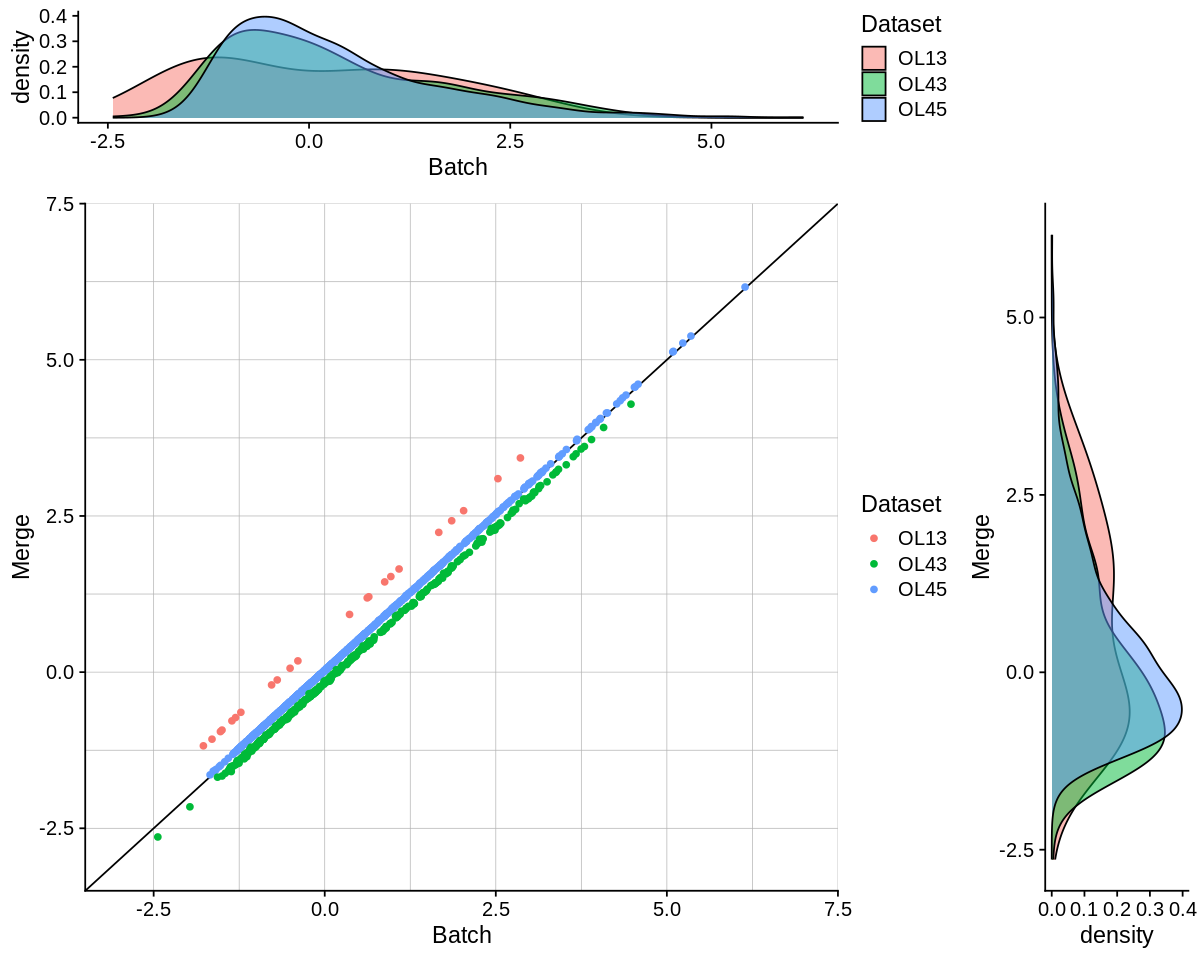

In [72]:
gpt_hist_top   = ggplot(dat,aes(x=Batch, fill=Dataset)) + geom_density(alpha=0.5) + theme_cowplot()
gpt_hist_right = ggplot(dat,aes(x=Merge, fill=Dataset)) + geom_density(alpha=0.5) + theme_cowplot() + 
    coord_flip() +
    theme(legend.position="none")

gpt_empty = ggplot() + 
    geom_point(aes(1,1), colour="white") +
    theme(panel.background = element_blank(), 
          axis.ticks   = element_blank(), 
          axis.text.x  = element_blank(), 
          axis.text.y  = element_blank(),           
          axis.title.x = element_blank(), 
          axis.title.y = element_blank())

tmp = element_line(color = "grey50", linewidth = 0.25, linetype = 1)
gpt_scatter = ggplot(dat, aes(x=Batch, y=Merge, color=Dataset)) + 
    geom_abline(slope=1, intercept=0) +
    geom_point() + 
    xlim(c(-3, 7)) +
    ylim(c(-3, 7)) + 
    theme_cowplot() +
    theme(
        panel.grid.major = element_line(color = "grey70", linewidth = 0.2, linetype = 1),
        panel.grid.minor = element_line(color = "grey70", linewidth = 0.2, linetype = 1)
    )

options(repr.plot.height=8, repr.plot.width=10)
grid.arrange(
    gpt_hist_top, 
    gpt_empty, 
    gpt_scatter, 
    gpt_hist_right, 
    ncol=2, 
    nrow=2, 
    widths=c(4, 1), 
    heights=c(1, 4))

## Distribution of counts

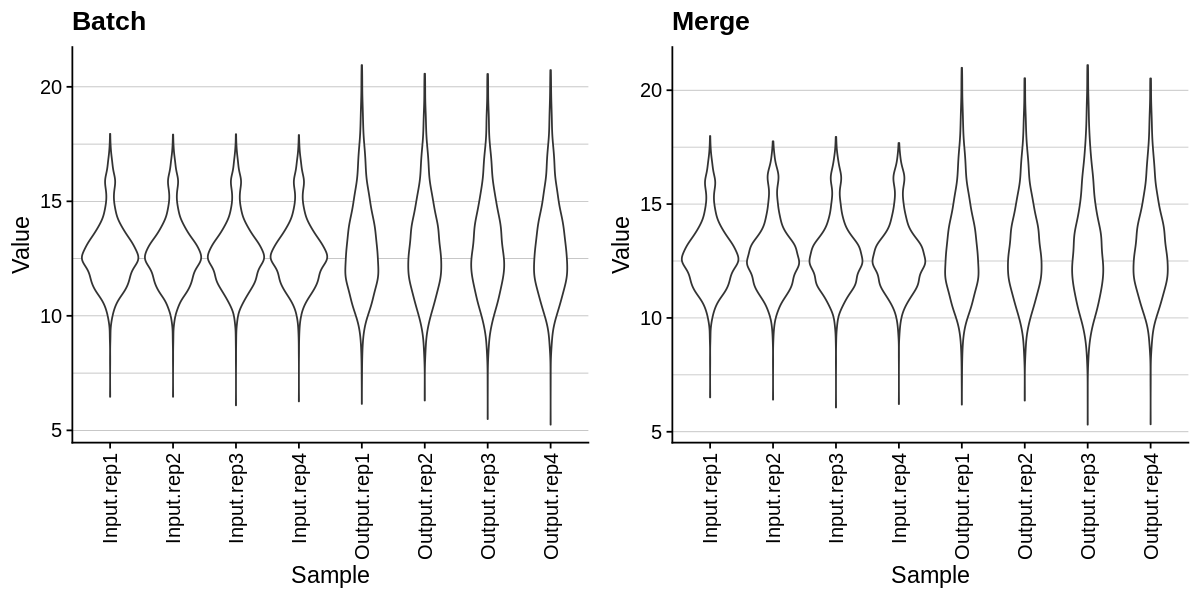

In [64]:
###
my_theme = theme(
    axis.text.x=element_text(angle=90, vjust=0.5, hjust=1),
    panel.grid.major.y = element_line(color = "grey70", linewidth = 0.2, linetype = 1),
    panel.grid.minor.y = element_line(color = "grey70", linewidth = 0.2, linetype = 1)
)

###
dat = dat_count_batch %>% 
    tidyr::gather(Sample, Value, -Peak, -Dataset) %>% 
    dplyr::mutate(Value = log2(Value))

gpt = ggplot(dat, aes(x=Sample, y=Value)) + 
    geom_violin() + 
    theme_cowplot() + 
    my_theme +
    labs(title="Batch")
gp1 = gpt

###
dat = dat_count_merge %>% 
    tidyr::gather(Sample, Value, -Peak) %>% 
    dplyr::mutate(Value = log2(Value))

gpt = ggplot(dat, aes(x=Sample, y=Value)) + 
    geom_violin() + 
    theme_cowplot() + 
    my_theme +
    labs(title="Merge")
gp2 = gpt

###
options(repr.plot.height=5, repr.plot.width=10)
plot_grid(gp1, gp2, nrow = 1, align = "h")

## Clustering (Batches: OL13, OL43, OL45)

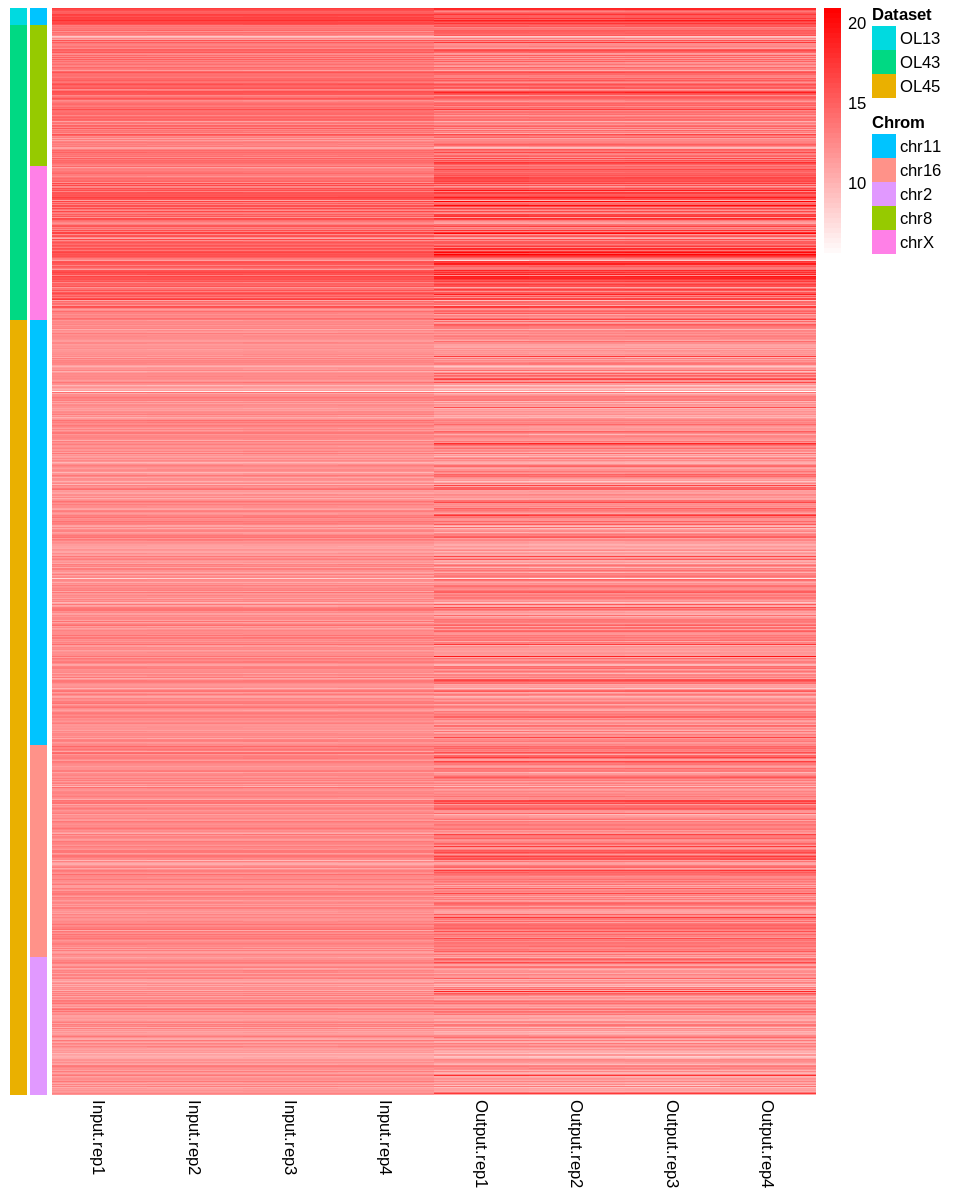

In [11]:
cnames = c("Peak", paste0("Input.rep", 1:4), paste0("Output.rep", 1:4))

dat_annot = dat_peak  %>% 
    dplyr::select(Peak, Chrom, Dataset) %>% 
    column_to_rownames(var="Peak")

dat_value = dat_count_batch %>% 
    dplyr::select(!!cnames) %>%
    column_to_rownames(var="Peak") %>%
    dplyr::mutate(across(where(is.numeric), log2))

num_palette = 50
vec_color   = colorRampPalette(c("white", "red"))(num_palette)

options(repr.plot.height=10, repr.plot.width=8)
pheatmap(dat_value,
         cluster_row   = FALSE,
         cluster_cols  = FALSE,
         show_rownames = FALSE,
         annotation_names_row = FALSE,
         annotation_row = dat_annot,
         color=vec_color)

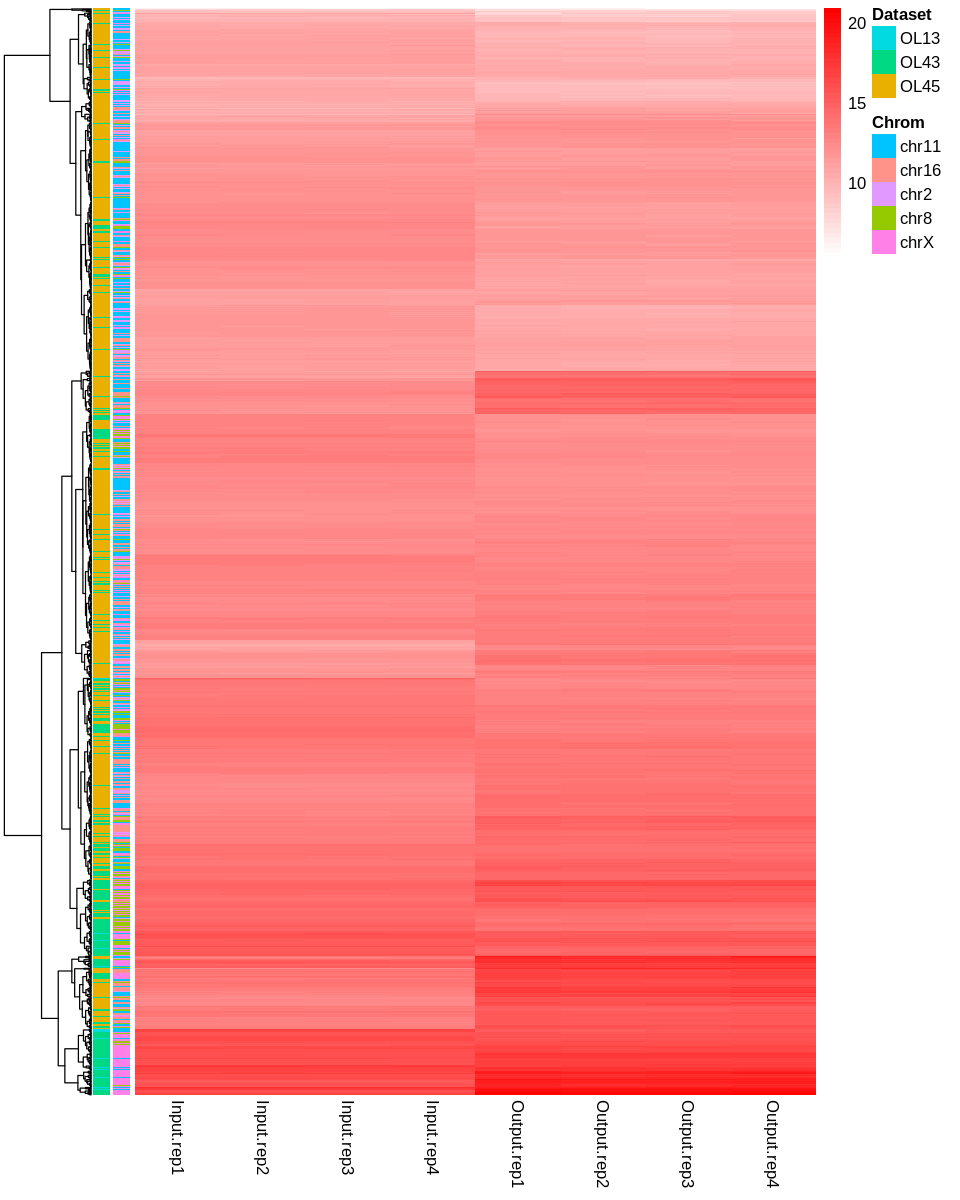

In [12]:
cnames = c("Peak", paste0("Input.rep", 1:4), paste0("Output.rep", 1:4))

dat_annot = dat_peak  %>% 
    dplyr::select(Peak, Chrom, Dataset) %>% 
    column_to_rownames(var="Peak")

dat_value = dat_count_batch %>% 
    dplyr::select(!!cnames) %>%
    column_to_rownames(var="Peak") %>%
    dplyr::mutate(across(where(is.numeric), log2))

num_palette = 50
vec_color   = colorRampPalette(c("white", "red"))(num_palette)

options(repr.plot.height=10, repr.plot.width=8)
pheatmap(dat_value,
         cluster_row   = TRUE,
         cluster_cols  = FALSE,
         show_rownames = FALSE,
         annotation_names_row = FALSE,
         annotation_row = dat_annot,
         color=vec_color)

## Clustering (Merge: OL13_OL43_OL45)

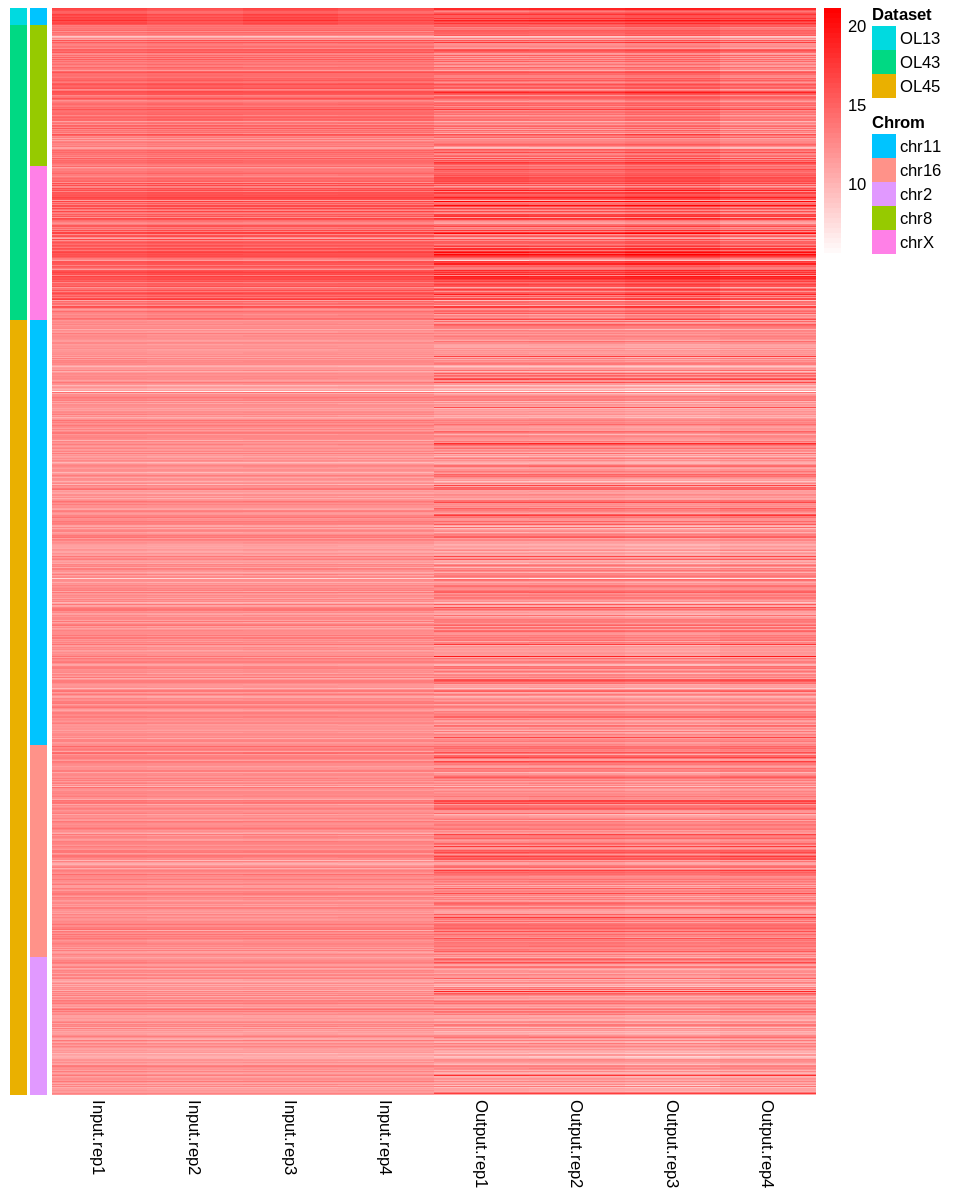

In [13]:
cnames = c("Peak", paste0("Input.rep", 1:4), paste0("Output.rep", 1:4))

dat_annot = dat_peak  %>% 
    dplyr::select(Peak, Chrom, Dataset) %>% 
    column_to_rownames(var="Peak")

dat_value = dat_count_merge %>% 
    dplyr::select(!!cnames) %>%
    column_to_rownames(var="Peak") %>%
    dplyr::mutate(across(where(is.numeric), log2))

num_palette = 50
vec_color   = colorRampPalette(c("white", "red"))(num_palette)

options(repr.plot.height=10, repr.plot.width=8)
pheatmap(dat_value,
         cluster_row   = FALSE,
         cluster_cols  = FALSE,
         show_rownames = FALSE,
         annotation_names_row = FALSE,
         annotation_row = dat_annot,
         color=vec_color)

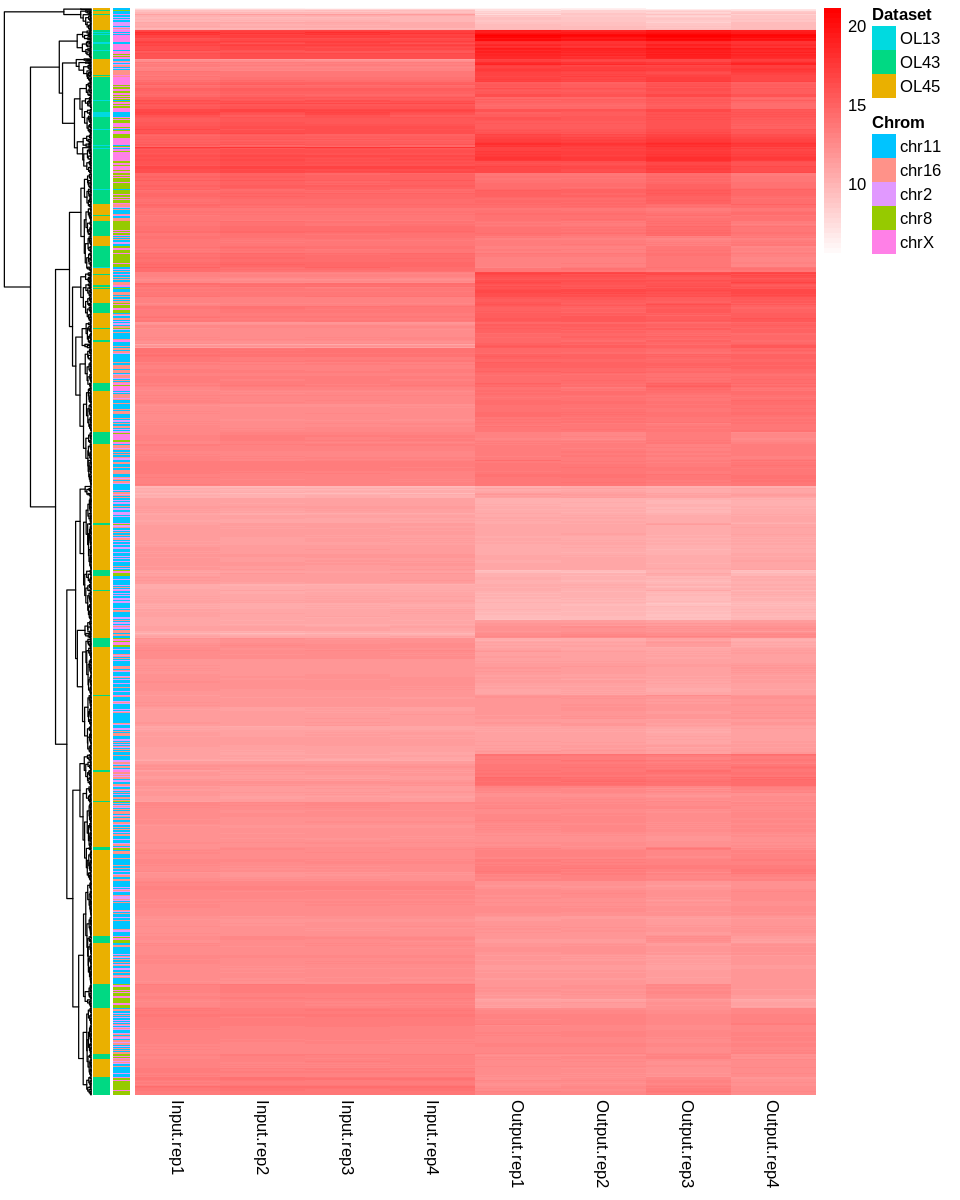

In [14]:
cnames = c("Peak", paste0("Input.rep", 1:4), paste0("Output.rep", 1:4))

dat_annot = dat_peak  %>% 
    dplyr::select(Peak, Chrom, Dataset) %>% 
    column_to_rownames(var="Peak")

dat_value = dat_count_merge %>% 
    dplyr::select(!!cnames) %>%
    column_to_rownames(var="Peak") %>%
    dplyr::mutate(across(where(is.numeric), log2))

num_palette = 50
vec_color   = colorRampPalette(c("white", "red"))(num_palette)

options(repr.plot.height=10, repr.plot.width=8)
pheatmap(dat_value,
         cluster_row   = TRUE,
         cluster_cols  = FALSE,
         show_rownames = FALSE,
         annotation_names_row = FALSE,
         annotation_row = dat_annot,
         color=vec_color)

In [15]:
DATASET = "OL13_OL43_OL45"

###
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = paste("matrix", "deseq", "count", DATASET, "tsv", sep=".")
fpath = file.path(fdiry, fname)
dat   = read_tsv(fpath, show_col_types = FALSE)

### 
dat_count = dat
print(dim(dat))
head(dat)

[1] 1451    9


Peak,Input.rep1,Input.rep2,Input.rep3,Input.rep4,Output.rep1,Output.rep2,Output.rep3,Output.rep4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61792068_61793464,128400.17,78342.13,128995.05,81828.58,387728.86,465098.228,635961.62,480064.23
chr11_61800085_61801113,96772.44,60184.56,94898.94,61362.85,357019.88,402538.985,538896.27,381543.64
chr11_61806630_61807154,75873.39,44447.41,71841.99,45911.45,25036.55,29175.077,44742.79,39671.64
chr11_61814735_61817343,208188.83,129586.85,205697.35,130343.87,1170674.41,1419142.823,1788293.74,1387864.90
chr11_61822094_61822443,33056.07,19924.66,32179.71,20432.55,6958.10,9476.503,15861.12,14318.36
chr11_61825795_61826306,33850.52,21317.47,34066.55,22593.64,24687.59,30085.096,38449.74,33488.58


In [13]:
DATASET = "OL13_OL43_OL45"

###
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = paste("result", "Log2FC", TYPE, "deseq", DATASET, "tsv", sep=".")
fpath = file.path(fdiry, fname)
dat   = read_tsv(fpath, show_col_types = FALSE)

### 
dat_log2fc = dat
print(dim(dat))
head(dat)

[1] 1451    7


Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11_61792068_61793464,298302.36,2.2372777,0.2178000,10.272163,9.407117e-25,3.095176e-24
chr11_61800085_61801113,249152.20,2.4232145,0.2095584,11.563433,6.313295e-31,2.602441e-30
chr11_61806630_61807154,47087.54,-0.7802144,0.2138748,-3.647996,2.642938e-04,3.544273e-04
chr11_61814735_61817343,804974.10,3.0971351,0.2059268,15.039984,4.016480e-51,2.490561e-50
chr11_61822094_61822443,19025.88,-1.1796750,0.3232780,-3.649104,2.631567e-04,3.532289e-04
chr11_61825795_61826306,29817.40,0.1802465,0.1777814,1.013866,3.106467e-01,3.326557e-01


## Compare the ranking

In [77]:
fun_ranknorm = function(x){
    return(rank(x)/length(x))
}

In [79]:
dat = dat_log2fc_batch
dat = dat %>% mutate(RankNorm = fun_ranknorm(log2FoldChange))
head(dat)

Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Dataset,RankNorm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
chr11_61792068_61793464,260242.12,1.6665705,0.04117109,40.479145,0.000000e+00,0.000000e+00,OL13,0.83873191
chr11_61800085_61801113,216437.58,1.8554055,0.04972890,37.310405,1.112851e-291,6.120682e-293,OL13,0.86698828
chr11_61806630_61807154,49327.33,-1.3562455,0.08825841,-15.366758,2.735191e-53,4.628784e-53,OL13,0.01791868
chr11_61814735_61817343,682819.52,2.5310135,0.03452518,73.309201,0.000000e+00,0.000000e+00,OL13,0.92901447
chr11_61822094_61822443,20363.10,-1.7731145,0.14597377,-12.146802,5.965339e-34,7.719850e-34,OL13,0.00206754
chr11_61825795_61826306,29539.40,-0.3921839,0.07941651,-4.938318,7.879932e-07,7.879932e-07,OL13,0.35975190


In [78]:
dat = dat_log2fc_merge
dat = dat %>% mutate(RankNorm = fun_ranknorm(log2FoldChange))
head(dat)

Peak,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Dataset,RankNorm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
chr11_61792068_61793464,298302.36,2.2372777,0.2178000,10.272163,9.407117e-25,3.095176e-24,OL13_OL43_OL45,0.90144728
chr11_61800085_61801113,249152.20,2.4232145,0.2095584,11.563433,6.313295e-31,2.602441e-30,OL13_OL43_OL45,0.92419021
chr11_61806630_61807154,47087.54,-0.7802144,0.2138748,-3.647996,2.642938e-04,3.544273e-04,OL13_OL43_OL45,0.21778084
chr11_61814735_61817343,804974.10,3.0971351,0.2059268,15.039984,4.016480e-51,2.490561e-50,OL13_OL43_OL45,0.96347347
chr11_61822094_61822443,19025.88,-1.1796750,0.3232780,-3.649104,2.631567e-04,3.532289e-04,OL13_OL43_OL45,0.06547209
chr11_61825795_61826306,29817.40,0.1802465,0.1777814,1.013866,3.106467e-01,3.326557e-01,OL13_OL43_OL45,0.55961406


In [80]:
dat %>% dplyr::pull(RankNorm) %>% head

[1] 0.83873191 0.86698828 0.01791868 0.92901447 0.00206754 0.35975190

In [84]:
###
dat1 = dat_log2fc_batch %>% 
    dplyr::mutate(RankNorm_Batch = fun_ranknorm(log2FoldChange)) %>% 
    dplyr::select(Peak, RankNorm_Batch)

dat2 = dat_log2fc_merge %>% 
    dplyr::mutate(RankNorm_Merge = fun_ranknorm(log2FoldChange)) %>% 
    dplyr::select(Peak, RankNorm_Merge)

###
dat = dat_peak %>% inner_join(dat1, by="Peak") %>% inner_join(dat2, by="Peak")

###
dat_ranknorm = dat
print(dim(dat))
head(dat)

[1] 1451    7


Peak,Chrom,Start,End,Dataset,RankNorm_Batch,RankNorm_Merge
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr11_61792068_61793464,chr11,61792068,61793464,OL13,0.83873191,0.90144728
chr11_61800085_61801113,chr11,61800085,61801113,OL13,0.86698828,0.92419021
chr11_61806630_61807154,chr11,61806630,61807154,OL13,0.01791868,0.21778084
chr11_61814735_61817343,chr11,61814735,61817343,OL13,0.92901447,0.96347347
chr11_61822094_61822443,chr11,61822094,61822443,OL13,0.00206754,0.06547209
chr11_61825795_61826306,chr11,61825795,61826306,OL13,0.35975190,0.55961406


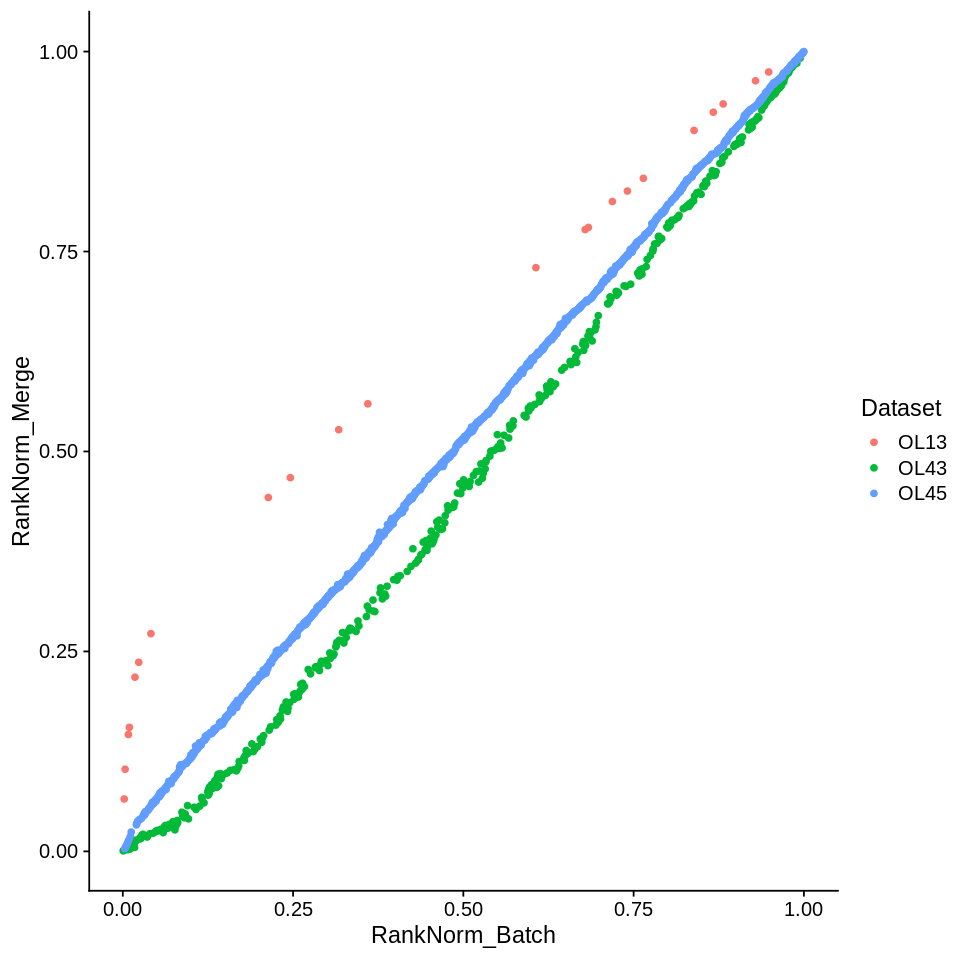

In [96]:
dat = dat_ranknorm
gpt = ggplot(dat, aes(x=RankNorm_Batch, y=RankNorm_Merge, color=Dataset)) + 
    geom_point() +
    theme_cowplot()

options(repr.plot.height=8, repr.plot.width=8)
print(gpt)

In [88]:
dat = dat_ranknorm
dat = dat %>% 
    dplyr::select(Peak, RankNorm_Batch, RankNorm_Merge) %>%
    tidyr::gather(Process, Value, -Peak)

head(dat)

Peak,Process,Value
<chr>,<chr>,<dbl>
chr11_61792068_61793464,RankNorm_Batch,0.83873191
chr11_61800085_61801113,RankNorm_Batch,0.86698828
chr11_61806630_61807154,RankNorm_Batch,0.01791868
chr11_61814735_61817343,RankNorm_Batch,0.92901447
chr11_61822094_61822443,RankNorm_Batch,0.00206754
chr11_61825795_61826306,RankNorm_Batch,0.35975190


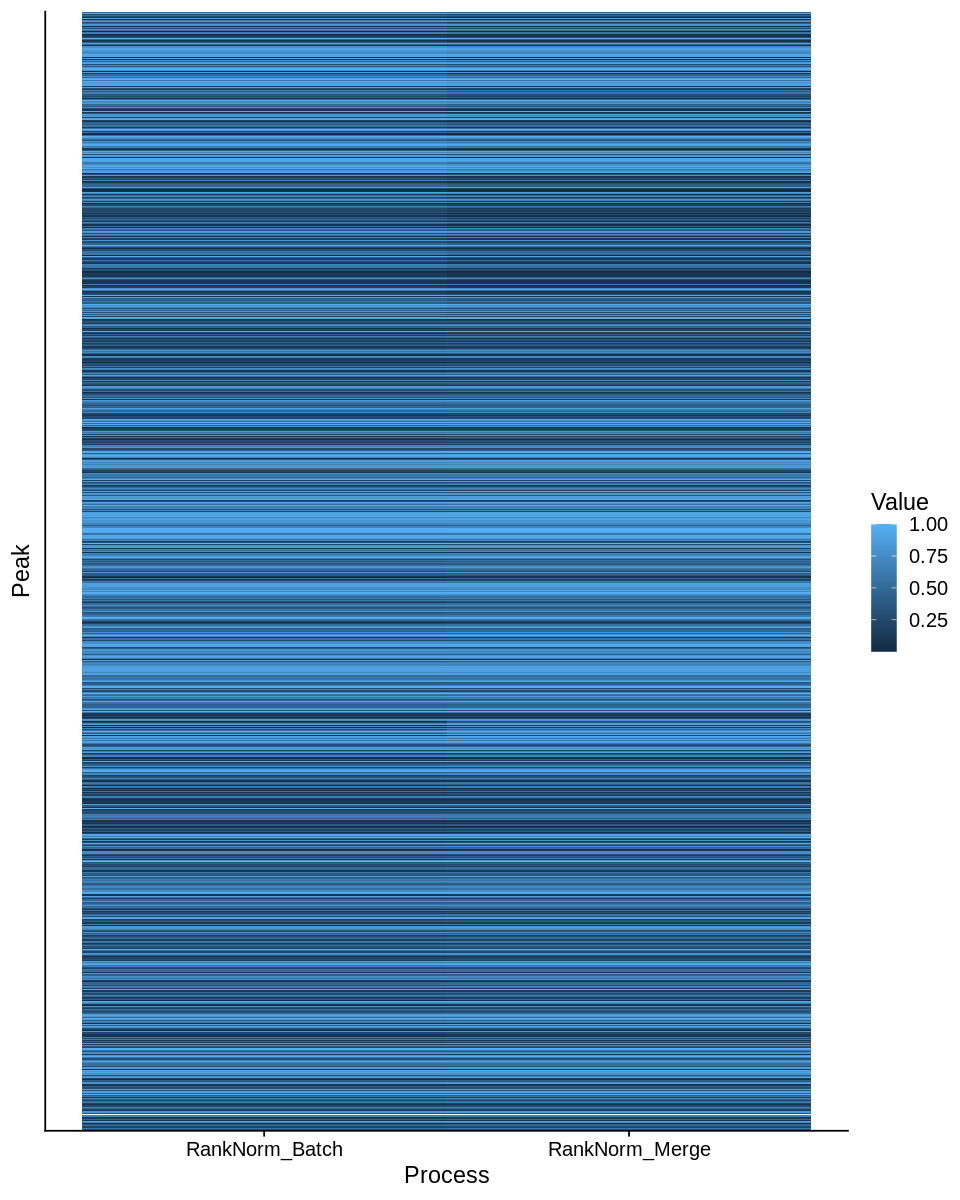

In [92]:
gpt = ggplot(dat, aes(x=Process, y=Peak, fill=Value)) + 
    geom_tile() + 
    theme_cowplot() +
    theme(
        axis.ticks.y=element_blank(),
        axis.text.y=element_blank())

options(repr.plot.height=10, repr.plot.width=8)
print(gpt)